In [31]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-05-23 20:34:54,936: Credentials are already in use. The existing account in the session will be replaced.


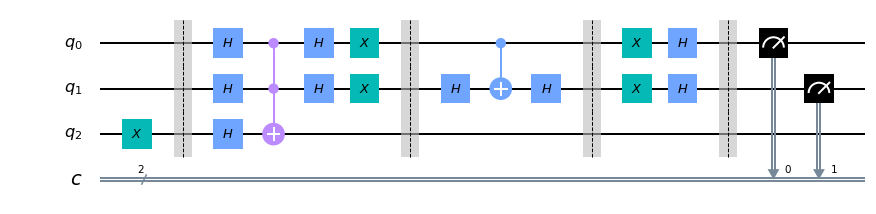

In [76]:
#(1) - przykład książkowy - obwód
circ = QuantumCircuit(3,2)

# for |00>
circ.x(2)
circ.barrier()
circ.h([0,1,2])
circ.ccx(0,1,2)
circ.h([0,1])
circ.x([0,1])
circ.barrier()
circ.h(1)
circ.cx(0,1)
circ.h(1)
circ.barrier()
circ.x([0,1])
circ.h([0,1])

circ.barrier()
circ.measure([0,1],[0,1])

circ.draw()

{'11': 1024}


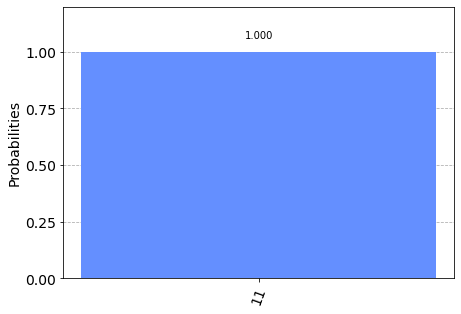

In [77]:
#(1) - przykład książkowy - symulator
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(circ)
print(measurement_result)
plot_histogram(measurement_result)

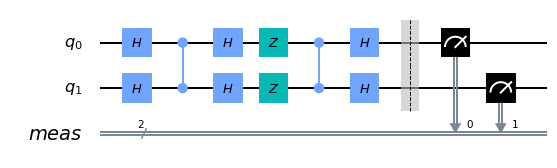

In [78]:
#(2) przykład IBM zoptymalizowany - obwód
circ2 = QuantumCircuit(2)

circ2.h([0,1])
circ2.cz(0,1)
circ2.h([0,1])
circ2.z([0,1])
circ2.cz(0,1)
circ2.h([0,1])
circ2.measure_all()
circ2.draw()

{'11': 1024}


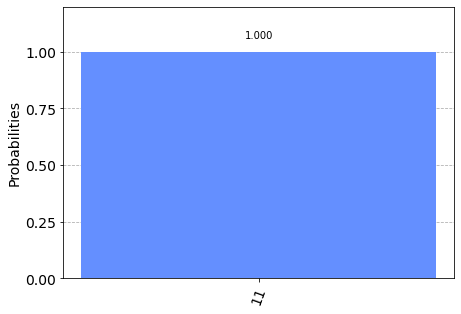

In [79]:
#(2) przykład IBM zoptymalizowany - symulator
job_sim2 = execute(circ2, backend, shots=1024)
sim_result2 = job_sim2.result()

measurement_result2 = sim_result2.get_counts(circ2)
print(measurement_result2)
plot_histogram(measurement_result2)

In [80]:
provider = IBMQ.load_account()
backendREAL = provider.get_backend('ibmq_burlington')

ibmqfactory.load_account:WARNING:2020-05-23 21:34:57,506: Credentials are already in use. The existing account in the session will be replaced.


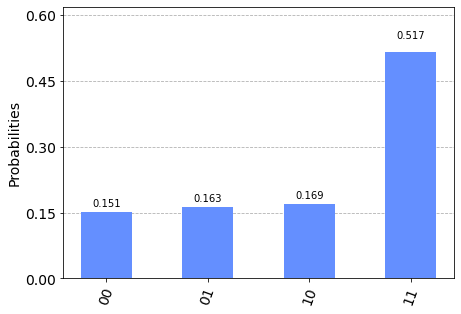

In [81]:
#(1) - przykład książkowy - realny komputer
job = execute(circ, backendREAL)
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts)

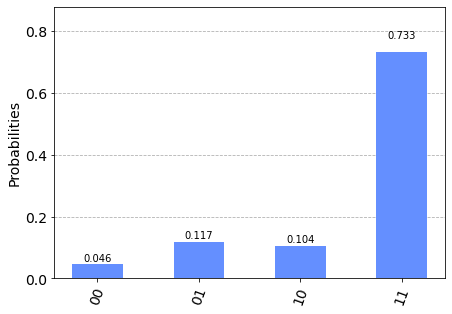

In [82]:
#(2) przykład IBM zoptymalizowany - realny komputer
job2 = execute(circ2, backendREAL)
result2 = job2.result()
counts2 = result2.get_counts(circ2)
plot_histogram(counts2)

Dla obwodów (1) i (2) w symulatorze nie można dostrzec różnic w wynikach, w obu przypadkach wynik zawsze pokrywał się ze wzorem skojarzonym z wyrocznią.

Natomiast w przypadku komputera realnego widzimy znaczną poprawę jakości wyników dla wersji IBM zoptymalizowanej. Związane jest to z obocnością mniejszej ilości bramek w przykładzie zoptymalizowanym poprzez zastąpienie bramki Toffoliego bramką CZ, a co za tym idzie zmniejszenie ilości wymaganych kabli.